In [1]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 15


In [2]:
tournaments = [   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                          'past-tokyo-2023-atp-singles',
                                          'past-beijing-2023-atp-singles', ###
                                          'past-shanghai-2023-atp-singles',
                                          'past-stockholm-2023-atp-singles',
                                          'past-antwerp-2023-atp-singles', ###
                                          'past-vienna-2023-atp-singles',
                                          'past-basel-2023-atp-singles',
                                          'past-paris-2023-atp-singles',
                                          'past-metz-2023-atp-singles',
                                          'past-finals-turin-2023-atp-singles',
                                          'past-stuttgart-atp-singles',
                                          'past-hertogenbosch-atp-singles',
                                          'past-halle-atp-singles',
                                          'past-london-atp-singles',
                                     ]

tennis_dataset = TennisMatchDataset(tournaments)

Loading data for tournaments {'past-marrakech-atp-singles', 'past-marseille-atp-singles', 'past-houston-atp-singles', 'past-antwerp-2023-atp-singles', 'past-montpellier-atp-singles', 'past-doha-2023-atp-singles', 'past-dubai-2023-atp-singles', 'past-rome-2023-atp-singles', 'past-lyon-atp-singles', 'past-monte-carlo-2023-atp-singles', 'past-shanghai-2023-atp-singles', 'past-beijing-2023-atp-singles', 'past-london-2023-atp-singles', 'past-zhuhai-2023-atp-singles', 'past-chengdu-2023-atp-singles', 'past-doha-atp-singles', 'past-santiago-atp-singles', 'past-finals-turin-2023-atp-singles', 'past-adelaide-2023-atp-singles', 'past-hertogenbosch-atp-singles', 'past-barcelona-atp-singles', 'past-adelaide-atp-singles', 'past-acapulco-atp-singles', 'past-marrakech-2023-atp-singles', 'past-rio-de-janeiro-atp-singles', 'past-dallas-atp-singles', 'past-french-open-atp-singles', 'past-acapulco-2023-atp-singles', 'past-french-open-2023-atp-singles', 'past-cordoba-atp-singles', 'past-santiago-2023-atp-

In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


  3%|▎         | 3/86 [00:00<00:03, 21.43it/s]

Error 'cf59' for match ALMnHsvI in tournament past-marrakech-atp-singles
Error 'bk40' for match hfsKEV06 in tournament past-marrakech-atp-singles
Error 'k09f' for match MNrJmzG7 in tournament past-marrakech-atp-singles
Error 'v832' for match Q7PSPAvp in tournament past-marrakech-atp-singles
Error 'bk40' for match Grc4wypA in tournament past-marrakech-atp-singles
Error 'f510' for match vD8It5JE in tournament past-marrakech-atp-singles
Error 'cf59' for match GhAemPbD in tournament past-marrakech-atp-singles
Error 'v832' for match pIRnqBzh in tournament past-marrakech-atp-singles
Error 'w367' for match MNfR2Lr2 in tournament past-marrakech-atp-singles
Error 'gb88' for match ritwkEyH in tournament past-marrakech-atp-singles
Error 'e687' for match SbfLsxTc in tournament past-marrakech-atp-singles
Error 'f510' for match xzgF5Nbq in tournament past-marrakech-atp-singles
Error 'bk40' for match pSrGrZKK in tournament past-marrakech-atp-singles
Error 'k09f' for match QTrprVkb in tournament past-

  3%|▎         | 3/86 [00:00<00:03, 21.43it/s]

Error 'm0gz' for match W06ey2jQ in tournament past-antwerp-2023-atp-singles
Error 'l0gh' for match M5cDh2Q8 in tournament past-antwerp-2023-atp-singles
Error 's0h2' for match vcxkgqVf in tournament past-antwerp-2023-atp-singles
Error 's0la' for match SE6htYVo in tournament past-antwerp-2023-atp-singles
Error 'bt72' for match Acb9xjVA in tournament past-antwerp-2023-atp-singles
Error 'n0bg' for match 0niMZmFT in tournament past-antwerp-2023-atp-singles
Error 'b0pg' for match 48ZmTQu0 in tournament past-antwerp-2023-atp-singles
Error 'g628' for match QHzpU6Qg in tournament past-antwerp-2023-atp-singles
Error 'l0cx' for match rBdHzUaN in tournament past-antwerp-2023-atp-singles
Error 'bm95' for match WfytVnBm in tournament past-antwerp-2023-atp-singles
Error 'cf59' for match pKjoSpe6 in tournament past-antwerp-2023-atp-singles
Error 'gb88' for match zu6duhoh in tournament past-antwerp-2023-atp-singles
Error 'rc91' for match dff5wWF4 in tournament past-antwerp-2023-atp-singles
Error 'mu94'

  7%|▋         | 6/86 [00:00<00:03, 20.14it/s]

Error 'l0cx' for match dpwEoHT8 in tournament past-montpellier-atp-singles
Error 'c0h0' for match lb0692af in tournament past-montpellier-atp-singles
Error 'lb66' for match lKDqPsfM in tournament past-montpellier-atp-singles
Error 'cg80' for match S2h8hXCB in tournament past-montpellier-atp-singles
Error 's0h2' for match boq1m8qA in tournament past-montpellier-atp-singles
Error 'su55' for match nVZgGImc in tournament past-montpellier-atp-singles
Error 'pd31' for match rwkWugJD in tournament past-montpellier-atp-singles
Error 'z419' for match jT1sAQtM in tournament past-montpellier-atp-singles
Error 'mp01' for match ClgSXBM7 in tournament past-montpellier-atp-singles
Error 's0h2' for match EVIbuqHB in tournament past-montpellier-atp-singles
Error 'l0cx' for match dfOgtP15 in tournament past-montpellier-atp-singles
Error 'mn13' for match GjNvj5kj in tournament past-montpellier-atp-singles
Error 'g09o' for match r32wB6RF in tournament past-montpellier-atp-singles
Error 'm0g4' for match UJ

Error 'cg80' for match tA8y6Xjl in tournament past-rome-2023-atp-singles
Error 'h997' for match C2W8ZVuT in tournament past-rome-2023-atp-singles
Error 'cg80' for match Gnoc5Jd4 in tournament past-rome-2023-atp-singles
Error 'h997' for match h8Ulk17a in tournament past-rome-2023-atp-singles
Error 'su87' for match OGSMGLi4 in tournament past-rome-2023-atp-singles
Error 'w09g' for match tQjKz5K9 in tournament past-rome-2023-atp-singles
Error 'z419' for match UHZDIsNi in tournament past-rome-2023-atp-singles
Error 'cf01' for match QqkhW0ii in tournament past-rome-2023-atp-singles
Error 'cg80' for match zgFlpqeq in tournament past-rome-2023-atp-singles
Error 's0h2' for match WxxlLGqC in tournament past-rome-2023-atp-singles
Error 'gb88' for match Ui8DVpor in tournament past-rome-2023-atp-singles
Error 'f724' for match KErLV912 in tournament past-rome-2023-atp-singles
Error 'ae14' for match d8D73gkL in tournament past-rome-2023-atp-singles
Error 'bt72' for match vqLz0mdj in tournament past-

 10%|█         | 9/86 [00:00<00:05, 15.18it/s]

Error 'z419' for match GlhYlfzS in tournament past-rome-2023-atp-singles
Error 'cf59' for match bs1HscAB in tournament past-rome-2023-atp-singles
Error 'cg80' for match vmm97anO in tournament past-rome-2023-atp-singles
Error 'mv14' for match p40L8DUg in tournament past-rome-2023-atp-singles
Error 'rc91' for match 0hO0hQ9G in tournament past-rome-2023-atp-singles
Error 'gd64' for match vBgCWKBN in tournament past-rome-2023-atp-singles
Error 'ki95' for match UmSrnq4s in tournament past-rome-2023-atp-singles
Error 'bk24' for match h4Ivor2j in tournament past-rome-2023-atp-singles
Error 'v812' for match QkSkQ3W0 in tournament past-rome-2023-atp-singles
Error 'w367' for match 0WEFpGef in tournament past-rome-2023-atp-singles
Error 's0h2' for match l6r0Gm4S in tournament past-rome-2023-atp-singles
Error 'f724' for match riQ2A0zn in tournament past-rome-2023-atp-singles
Error 'kd46' for match bebiyqch in tournament past-rome-2023-atp-singles
Error 'mp20' for match AcQ5TfaE in tournament past-

Error 'bk40' for match A7i4UNml in tournament past-monte-carlo-2023-atp-singles
Error 'tb69' for match EiUUTQGJ in tournament past-monte-carlo-2023-atp-singles
Error 'w367' for match OKrVbBt6 in tournament past-monte-carlo-2023-atp-singles
Error 'su87' for match IuqK4s8J in tournament past-monte-carlo-2023-atp-singles
Error 'i305' for match trxaQupn in tournament past-monte-carlo-2023-atp-singles
Error 'sm37' for match Y5numTap in tournament past-monte-carlo-2023-atp-singles
Error 'n0bg' for match OUg5dLKq in tournament past-monte-carlo-2023-atp-singles
Error 'bd06' for match ncjbs5fk in tournament past-monte-carlo-2023-atp-singles
Error 'v812' for match Ayosd9QO in tournament past-monte-carlo-2023-atp-singles
Error 'bm95' for match EogoaKzk in tournament past-monte-carlo-2023-atp-singles
Error 'e687' for match hA1ICdlT in tournament past-monte-carlo-2023-atp-singles
Error 'ge28' for match WvRb7coa in tournament past-monte-carlo-2023-atp-singles
Error 'ki95' for match KhoYWmdp in tourn

Error 'l987' for match Mm4Qzy1F in tournament past-monte-carlo-2023-atp-singles
Error 'pd31' for match ra4Yrvhq in tournament past-monte-carlo-2023-atp-singles
Error 'f724' for match IovYq5Kn in tournament past-monte-carlo-2023-atp-singles
Error 'i305' for match Em6fE7Vf in tournament past-monte-carlo-2023-atp-singles
Error 'n0bg' for match hfgMS6pl in tournament past-monte-carlo-2023-atp-singles
Error 'rh24' for match WQwKxlDJ in tournament past-monte-carlo-2023-atp-singles
Error 'l987' for match AH2cVngt in tournament past-monte-carlo-2023-atp-singles
Error 'ge28' for match hth2U68n in tournament past-monte-carlo-2023-atp-singles
Error 'bk24' for match 06eASpwa in tournament past-monte-carlo-2023-atp-singles
Error 'cn78' for match zPmNPrNH in tournament past-monte-carlo-2023-atp-singles
Error 'ki82' for match vcfER4h5 in tournament past-monte-carlo-2023-atp-singles
Error 'bd80' for match n3VzEoO5 in tournament past-monte-carlo-2023-atp-singles
Error 'i305' for match QgUvD5wC in tourn

 13%|█▎        | 11/86 [00:00<00:06, 12.26it/s]

Error 'a0gc' for match 0h64moQp in tournament past-shanghai-2023-atp-singles
Error 'h09f' for match dvn38n2A in tournament past-shanghai-2023-atp-singles
Error 'mc10' for match 2HQTgmmH in tournament past-shanghai-2023-atp-singles
Error 'tc01' for match bqKxhRHT in tournament past-shanghai-2023-atp-singles
Error 'n897' for match vFZ8bBYo in tournament past-shanghai-2023-atp-singles
Error 'z0cq' for match SbfnCU2o in tournament past-shanghai-2023-atp-singles
Error 'h0bh' for match GKUXh72N in tournament past-shanghai-2023-atp-singles
Error 'k0az' for match 8fRPfTXA in tournament past-shanghai-2023-atp-singles
Error 'sq79' for match SvW4aiJu in tournament past-shanghai-2023-atp-singles
Error 'x01a' for match lEreA8Xc in tournament past-shanghai-2023-atp-singles
Error 'lc54' for match lSNTO7ni in tournament past-shanghai-2023-atp-singles
Error 'd994' for match 6kgjBlIi in tournament past-shanghai-2023-atp-singles
Error 'l0fw' for match CSXGdk3b in tournament past-shanghai-2023-atp-singles

 16%|█▋        | 14/86 [00:00<00:04, 14.71it/s]

Error 'e687' for match df0hRu94 in tournament past-beijing-2023-atp-singles
Error 'mk66' for match QeqsUsPo in tournament past-beijing-2023-atp-singles
Error 'mc10' for match nqg5OwgN in tournament past-beijing-2023-atp-singles
Error 'z0cq' for match MsJW9vvU in tournament past-beijing-2023-atp-singles
Error 'hg86' for match vDj14O5b in tournament past-beijing-2023-atp-singles
Error 'w09g' for match KAz06pyn in tournament past-beijing-2023-atp-singles
Error 'su87' for match CQMNtL8i in tournament past-beijing-2023-atp-singles
Error 'ki95' for match QolpmxlE in tournament past-beijing-2023-atp-singles
Error 'gd64' for match GOANngzk in tournament past-beijing-2023-atp-singles
Error 'v832' for match 2NZPM9a3 in tournament past-beijing-2023-atp-singles
Error 'ph71' for match Yy7HN42m in tournament past-beijing-2023-atp-singles
Error 'ki95' for match hjJJpGnn in tournament past-beijing-2023-atp-singles
Error 'gd64' for match EaKFodXu in tournament past-beijing-2023-atp-singles
Error 'h997'

 16%|█▋        | 14/86 [00:01<00:04, 14.71it/s]

Error 'd864' for match lESND9Ob in tournament past-chengdu-2023-atp-singles
Error 'tc01' for match 8OvA4Ibi in tournament past-chengdu-2023-atp-singles
Error 'k09f' for match GjZpNNAm in tournament past-chengdu-2023-atp-singles
Error 'd864' for match 2TAEuov5 in tournament past-chengdu-2023-atp-singles
Error 'cf10' for match xn3RxqON in tournament past-chengdu-2023-atp-singles
Error 'n09u' for match 86BAtROb in tournament past-chengdu-2023-atp-singles
Error 'k09f' for match tK9Iv5gB in tournament past-chengdu-2023-atp-singles
Error 'x01a' for match W82Vy3wU in tournament past-chengdu-2023-atp-singles
Error 'tc01' for match dW76s79h in tournament past-chengdu-2023-atp-singles
Error 'z0ab' for match be4NwP8H in tournament past-chengdu-2023-atp-singles
Error 'hh15' for match E7I1rmfn in tournament past-chengdu-2023-atp-singles
Error 'm0ni' for match GnNpDfUo in tournament past-doha-atp-singles
Error 'm0ni' for match G6FbYY22 in tournament past-doha-atp-singles
Error 'm0ni' for match YoM9C

Error 'z0a1' for match ShyQ6Zis in tournament past-doha-atp-singles
Error 's0nv' for match 61aXKdn3 in tournament past-doha-atp-singles
Error 'ki82' for match WMkfCeUJ in tournament past-doha-atp-singles
Error 'f724' for match vTCvJzHF in tournament past-doha-atp-singles
Error 'k09f' for match 0xEzKG19 in tournament past-doha-atp-singles
Error 'c0bc' for match Ov14HNuB in tournament past-doha-atp-singles
Error 'd923' for match hW23ezKp in tournament past-doha-atp-singles
Error 'mn13' for match 27Fxtt27 in tournament past-doha-atp-singles
Error 'mp20' for match d0HX0ddN in tournament past-doha-atp-singles
Error 'z09z' for match trrN95Ic in tournament past-doha-atp-singles
Error 'mp20' for match tt33kyXr in tournament past-doha-atp-singles
Error 'f510' for match 2eiCmF1e in tournament past-doha-atp-singles
Error 'n409' for match O4h8lenk in tournament past-doha-atp-singles
Error 'hg94' for match bJxS8PX3 in tournament past-doha-atp-singles
Error 'mn13' for match WWzz732G in tournament pa

 22%|██▏       | 19/86 [00:01<00:03, 18.68it/s]

Error 'ph71' for match 0fguUiyq in tournament past-hertogenbosch-atp-singles
Error 'r975' for match Od6Vv9k1 in tournament past-hertogenbosch-atp-singles
Error 'c0h0' for match SUCMtVKl in tournament past-hertogenbosch-atp-singles
Error 'v812' for match 8My7n0iA in tournament past-hertogenbosch-atp-singles
Error 'm0ni' for match YuBq2u9O in tournament past-hertogenbosch-atp-singles
Error 'n679' for match 2LvL6TK5 in tournament past-hertogenbosch-atp-singles
Error 'gb88' for match UZpdQ9z8 in tournament past-hertogenbosch-atp-singles
Error 'g0a0' for match WYuCTZFk in tournament past-hertogenbosch-atp-singles
Error 'c0jt' for match Am1pF1lS in tournament past-hertogenbosch-atp-singles
Error 'bu13' for match SYYzwz77 in tournament past-hertogenbosch-atp-singles
Error 'gd64' for match UPslpNwf in tournament past-hertogenbosch-atp-singles
Error 'v0am' for match WQctOZle in tournament past-hertogenbosch-atp-singles
Error 'h0eq' for match hEehX6PO in tournament past-hertogenbosch-atp-singles

 26%|██▌       | 22/86 [00:01<00:03, 18.05it/s]

Error 'd0cg' for match GllmMJtn in tournament past-barcelona-atp-singles
Error 'ta29' for match fcvgUhU0 in tournament past-barcelona-atp-singles
Error 'l987' for match Mm4Jm5JM in tournament past-barcelona-atp-singles
Error 'bd06' for match MRn9fzQF in tournament past-barcelona-atp-singles
Error 'n0ae' for match bsZeK6sf in tournament past-barcelona-atp-singles
Error 'ae14' for match 2sdS0hml in tournament past-barcelona-atp-singles
Error 'o513' for match C0FACwvn in tournament past-barcelona-atp-singles
Error 'cf59' for match Mwqxls66 in tournament past-barcelona-atp-singles
Error 'v0dz' for match EmdwHuzg in tournament past-barcelona-atp-singles
Error 'n409' for match 29Oj6eDD in tournament past-barcelona-atp-singles
Error 'l987' for match vXGNN1aU in tournament past-barcelona-atp-singles
Error 'mp20' for match jXoTa0ft in tournament past-barcelona-atp-singles
Error 'mu94' for match 2L2Y1b6L in tournament past-barcelona-atp-singles
Error 'ta29' for match ARyWigHG in tournament past-

 26%|██▌       | 22/86 [00:01<00:03, 18.05it/s]

Error 'ke73' for match xE5IFrPr in tournament past-acapulco-atp-singles
Error 'ki95' for match bRtTwGCO in tournament past-acapulco-atp-singles
Error 'l987' for match lIUHgv89 in tournament past-acapulco-atp-singles
Error 'k0az' for match pQBVss9c in tournament past-acapulco-atp-singles
Error 'ae14' for match 8t4f7cx9 in tournament past-acapulco-atp-singles
Error 'o513' for match jVOFlrSr in tournament past-acapulco-atp-singles
Error 'n732' for match dSRNnMde in tournament past-acapulco-atp-singles
Error 'ke73' for match OKny5nfk in tournament past-acapulco-atp-singles
Error 'p0j1' for match ER2aPKCa in tournament past-acapulco-atp-singles
Error 'ae14' for match zy4eQ0cg in tournament past-acapulco-atp-singles


 28%|██▊       | 24/86 [00:01<00:03, 15.78it/s]

Error 'k0az' for match Euj1aJ26 in tournament past-acapulco-atp-singles
Error 'mp01' for match vNcl2LIm in tournament past-acapulco-atp-singles
Error 'a0gc' for match 0xnc0am0 in tournament past-acapulco-atp-singles
Error 'ph71' for match MTNKW2KP in tournament past-acapulco-atp-singles
Error 'da81' for match tYOGTZ3o in tournament past-acapulco-atp-singles
Error 'bt72' for match 82k5bwIC in tournament past-acapulco-atp-singles
Error 'e873' for match rwPGXr5J in tournament past-acapulco-atp-singles
Error 'e687' for match KONKSgJi in tournament past-acapulco-atp-singles
Error 'ki95' for match vTpY4jRp in tournament past-acapulco-atp-singles
Error 'n732' for match MHN6XiO2 in tournament past-acapulco-atp-singles
Error 'a0gc' for match 8tbZ10YH in tournament past-acapulco-atp-singles
Error 'lb66' for match 2uPvPQz7 in tournament past-acapulco-atp-singles
Error 'h0bh' for match OjH3pY2p in tournament past-acapulco-atp-singles
Error 'mp01' for match MXDgIj5C in tournament past-acapulco-atp-

Error 'mw02' for match tQrnpffJ in tournament past-french-open-atp-singles
Error 'bu13' for match raUQS206 in tournament past-french-open-atp-singles
Error 'kd46' for match GMkulYhC in tournament past-french-open-atp-singles
Error 'kc04' for match r9iXkfOa in tournament past-french-open-atp-singles
Error 'su55' for match SQS3zTEq in tournament past-french-open-atp-singles
Error 'mw02' for match EqEnbTvm in tournament past-french-open-atp-singles
Error 'k09f' for match OdU78ZyB in tournament past-french-open-atp-singles
Error 'rc91' for match b5kXzvTI in tournament past-french-open-atp-singles
Error 'l987' for match I9MciaDa in tournament past-french-open-atp-singles
Error 'm0jz' for match 8hCemfGl in tournament past-french-open-atp-singles
Error 'kc04' for match COgzainS in tournament past-french-open-atp-singles
Error 'kd46' for match 08MpPLaN in tournament past-french-open-atp-singles
Error 'mu94' for match YL4gz1w1 in tournament past-french-open-atp-singles
Error 'f510' for match 6N

 31%|███▏      | 27/86 [00:02<00:04, 11.91it/s]

Error 'pg94' for match 8W6ziG3F in tournament past-french-open-atp-singles
Error 's0re' for match rVl6s3WI in tournament past-french-open-atp-singles
Error 'u134' for match AHjbqP16 in tournament past-french-open-atp-singles
Error 'y218' for match AD0nSQR7 in tournament past-french-open-atp-singles
Error 'mw76' for match pC0EqYek in tournament past-french-open-atp-singles
Error 'da31' for match 0txtP0Fb in tournament past-french-open-atp-singles
Error 'kc04' for match jV8N6JaU in tournament past-french-open-atp-singles
Error 'g0gw' for match SnnXdcld in tournament past-french-open-atp-singles
Error 'm0to' for match bD56yV4L in tournament past-french-open-atp-singles
Error 'g0ix' for match l8BXcOGa in tournament past-french-open-atp-singles
Error 'm0jf' for match Gpl4AAJl in tournament past-french-open-atp-singles
Error 'r0go' for match jm2bwiz9 in tournament past-french-open-atp-singles
Error 'm0jz' for match EPDbCNVh in tournament past-french-open-atp-singles
Error 'mv14' for match KM

Error 'ph71' for match YDCv1fpH in tournament past-french-open-2023-atp-singles
Error 'va08' for match I94PJONJ in tournament past-french-open-2023-atp-singles
Error 'da31' for match EssbYSgE in tournament past-french-open-2023-atp-singles
Error 'n732' for match QshRujDF in tournament past-french-open-2023-atp-singles
Error 's0la' for match fXzQsVA2 in tournament past-french-open-2023-atp-singles
Error 'y218' for match WxEk7ovE in tournament past-french-open-2023-atp-singles
Error 'mp20' for match EXXDFgaA in tournament past-french-open-2023-atp-singles
Error 'v0dz' for match MDP7DRHl in tournament past-french-open-2023-atp-singles
Error 'l987' for match MmfCAP17 in tournament past-french-open-2023-atp-singles
Error 'kb05' for match WlhFfhNp in tournament past-french-open-2023-atp-singles
Error 'ae14' for match hxCjTCT9 in tournament past-french-open-2023-atp-singles
Error 'm0jf' for match rHXfo4Hf in tournament past-french-open-2023-atp-singles
Error 'tb69' for match phtcJy0o in tourn

 36%|███▌      | 31/86 [00:02<00:05, 10.95it/s]

Error 'bf23' for match rinznIUR in tournament past-cordoba-atp-singles
Error 'r772' for match 8AmVoEz5 in tournament past-cordoba-atp-singles
Error 'm0tb' for match fPAYvim3 in tournament past-cordoba-atp-singles
Error 'h997' for match jTe3S328 in tournament past-cordoba-atp-singles
Error 'b0fv' for match dpLgwyU8 in tournament past-cordoba-atp-singles
Error 'z419' for match 6FGwKuAl in tournament past-cordoba-atp-singles
Error 'cf59' for match bgaBQsXK in tournament past-cordoba-atp-singles
Error 'bs86' for match j7KcxeqF in tournament past-cordoba-atp-singles
Error 'ce77' for match EuKoIJv1 in tournament past-cordoba-atp-singles
Error 'd0cg' for match nZD6zZDR in tournament past-cordoba-atp-singles
Error 'r772' for match 0xGsJaPf in tournament past-cordoba-atp-singles
Error 'da31' for match xpbFP1nR in tournament past-cordoba-atp-singles
Error 'bf23' for match 4AO1yFbL in tournament past-cordoba-atp-singles
Error 'e687' for match 4Wa7RNHE in tournament past-cordoba-atp-singles
Error 

Error 'su55' for match KnSawxQg in tournament past-wimbledon-2023-atp-singles
Error 'h997' for match Cn8rELdr in tournament past-wimbledon-2023-atp-singles
Error 'm0hu' for match 06ZWyp6n in tournament past-wimbledon-2023-atp-singles
Error 'bm95' for match vZgwMzeJ in tournament past-wimbledon-2023-atp-singles
Error 'bd06' for match n50eBJt1 in tournament past-wimbledon-2023-atp-singles
Error 'mp20' for match KAIvIFuQ in tournament past-wimbledon-2023-atp-singles
Error 'cg80' for match CMOiubes in tournament past-wimbledon-2023-atp-singles
Error 'f0dm' for match jwTsMLxT in tournament past-wimbledon-2023-atp-singles
Error 'hg86' for match trIbTCJq in tournament past-wimbledon-2023-atp-singles
Error 'sy67' for match rkswRhIt in tournament past-wimbledon-2023-atp-singles
Error 'wb32' for match OOj6X9c3 in tournament past-wimbledon-2023-atp-singles
Error 'bt72' for match jFUeWuzO in tournament past-wimbledon-2023-atp-singles
Error 'o513' for match YwzjOj2a in tournament past-wimbledon-202

 38%|███▊      | 33/86 [00:02<00:06,  8.45it/s]

Error 'l949' for match WphAFomJ in tournament past-wimbledon-2023-atp-singles
Error 'u134' for match lrGZvNXR in tournament past-wimbledon-2023-atp-singles
Error 'p0gq' for match hfg6GRXC in tournament past-wimbledon-2023-atp-singles
Error 'wb08' for match f164fsGH in tournament past-wimbledon-2023-atp-singles
Error 'ki95' for match bBQwknwN in tournament past-estoril-2023-atp-singles
Error 'hb64' for match IaPeHaD0 in tournament past-estoril-2023-atp-singles
Error 'cf01' for match KCycMxRR in tournament past-estoril-2023-atp-singles
Error 'hb64' for match n16R2h72 in tournament past-estoril-2023-atp-singles
Error 'ki95' for match Uc5EBwc3 in tournament past-estoril-2023-atp-singles
Error 'cf01' for match GEaJpmR5 in tournament past-estoril-2023-atp-singles
Error 'bd06' for match 0SMqRpIn in tournament past-estoril-2023-atp-singles
Error 'z419' for match SvGLcJFp in tournament past-estoril-2023-atp-singles
Error 'tb69' for match QRFVm0L8 in tournament past-estoril-2023-atp-singles
Erro

 41%|████      | 35/86 [00:03<00:05,  9.58it/s]

Error 'me89' for match MoccrmDb in tournament past-winston-salem-2023-atp-singles
Error 'gc88' for match OUDHBaBL in tournament past-halle-atp-singles
Error 'bk40' for match Au5RNoec in tournament past-halle-atp-singles
Error 'd994' for match vVVvGSH5 in tournament past-halle-atp-singles
Error 'su87' for match 8KQxPqIP in tournament past-halle-atp-singles
Error 'ke73' for match rN08fLkS in tournament past-halle-atp-singles
Error 'bk40' for match 8jsJSaxI in tournament past-halle-atp-singles
Error 's0ak' for match pQgVcqrC in tournament past-halle-atp-singles
Error 'o449' for match rqdgY38t in tournament past-halle-atp-singles
Error 'ph71' for match vBk2Wswg in tournament past-halle-atp-singles
Error 'gc88' for match OWtcCrc5 in tournament past-halle-atp-singles
Error 'f0fv' for match nygAUL75 in tournament past-halle-atp-singles
Error 'bt72' for match OA5Ma5Da in tournament past-halle-atp-singles
Error 'o513' for match Wdp5AMRH in tournament past-halle-atp-singles
Error 'ke73' for matc

 43%|████▎     | 37/86 [00:03<00:05,  8.32it/s]

Error 'h09p' for match I7iDET88 in tournament past-australian-open-2023-atp-singles
Error 'mp20' for match WbqQhnnk in tournament past-australian-open-2023-atp-singles
Error 'ph71' for match A5Wi7o1r in tournament past-australian-open-2023-atp-singles
Error 'v306' for match hviM6ams in tournament past-australian-open-2023-atp-singles
Error 'ga36' for match rRS6djb8 in tournament past-australian-open-2023-atp-singles
Error 'p09o' for match f5nCz9yk in tournament past-australian-open-2023-atp-singles
Error 'l0cx' for match WjBbLxWp in tournament past-australian-open-2023-atp-singles
Error 's0n0' for match AgjPRYgA in tournament past-australian-open-2023-atp-singles
Error 'k926' for match 0CSpxlrj in tournament past-australian-open-2023-atp-singles
Error 's0gr' for match C4ThM23d in tournament past-australian-open-2023-atp-singles
Error 's0la' for match IiZPF0VI in tournament past-australian-open-2023-atp-singles
Error 'w09e' for match KWXYPVos in tournament past-australian-open-2023-atp-

 48%|████▊     | 41/86 [00:03<00:04, 10.09it/s]

Error 'ph71' for match OYyX1Ntt in tournament past-cincinnati-2023-atp-singles
Error 'l987' for match htIIhQvg in tournament past-cincinnati-2023-atp-singles
Error 'w367' for match C6MGAXd1 in tournament past-cincinnati-2023-atp-singles
Error 'mk66' for match K0oGYfiD in tournament past-cincinnati-2023-atp-singles
Error 'rh24' for match 08hyMlf5 in tournament past-cincinnati-2023-atp-singles
Error 'w367' for match 2NyazVTC in tournament past-cincinnati-2023-atp-singles
Error 'mk66' for match p2TL6cX3 in tournament past-cincinnati-2023-atp-singles
Error 'cg80' for match ELg6OScD in tournament past-cincinnati-2023-atp-singles
Error 'ph71' for match n92kSAbl in tournament past-cincinnati-2023-atp-singles
Error 'su87' for match O8Um5Vw9 in tournament past-cincinnati-2023-atp-singles
Error 'l987' for match UmhgBA95 in tournament past-cincinnati-2023-atp-singles
Error 'n732' for match bosYx31n in tournament past-cincinnati-2023-atp-singles
Error 'mk66' for match M3zewChA in tournament past-c

 50%|█████     | 43/86 [00:03<00:03, 11.35it/s]

Error 'su55' for match vJeosLWC in tournament past-barcelona-2023-atp-singles
Error 'rh24' for match fuVoUXQ4 in tournament past-barcelona-2023-atp-singles
Error 'n732' for match bgHPg9vn in tournament past-barcelona-2023-atp-singles
Error 'kb95' for match KpNZzqrK in tournament past-barcelona-2023-atp-singles
Error 'e687' for match vDvgYoaQ in tournament past-barcelona-2023-atp-singles
Error 'cg04' for match 2RJWpv1M in tournament past-barcelona-2023-atp-singles
Error 'p0ct' for match SfvpRcTh in tournament past-barcelona-2023-atp-singles
Error 'k09f' for match YgdXEo8I in tournament past-barcelona-2023-atp-singles
Error 's0h2' for match xWEX01Fm in tournament past-barcelona-2023-atp-singles
Error 'n732' for match dKw0Y3Ch in tournament past-barcelona-2023-atp-singles
Error 'sm37' for match Ob7AwSIF in tournament past-barcelona-2023-atp-singles
Error 'ga36' for match rLuOo5TP in tournament past-barcelona-2023-atp-singles
Error 'su55' for match QkApzfkl in tournament past-barcelona-202

 52%|█████▏    | 45/86 [00:03<00:03, 10.73it/s]

Error 'mw02' for match 8YVJFD50 in tournament past-madrid-2023-atp-singles
Error 'r09x' for match EcHGGgjf in tournament past-madrid-2023-atp-singles
Error 'e831' for match bs76XH55 in tournament past-madrid-2023-atp-singles
Error 'w09g' for match rip2Sjk6 in tournament past-madrid-2023-atp-singles
Error 'l0il' for match pC6DPT7R in tournament past-madrid-2023-atp-singles
Error 'mj08' for match dfCEyeSJ in tournament past-madrid-2023-atp-singles
Error 'kd46' for match nLhuLmGr in tournament past-madrid-2023-atp-singles
Error 'rh24' for match hrDVECg9 in tournament past-madrid-2023-atp-singles
Error 'pd31' for match zoBIzFsQ in tournament past-madrid-2023-atp-singles
Error 'k09f' for match UmKSDizD in tournament past-madrid-2023-atp-singles
Error 'sm37' for match z7ICHZzl in tournament past-madrid-2023-atp-singles
Error 'c0bc' for match rDiA7Uoq in tournament past-madrid-2023-atp-singles
Error 'l0cx' for match fVikVh5m in tournament past-madrid-2023-atp-singles
Error 'cf59' for match xW

 56%|█████▌    | 48/86 [00:04<00:02, 13.19it/s]

Error 's0nv' for match lW94lbtb in tournament past-mallorca-2023-atp-singles
Error 'k09f' for match t66djKBo in tournament past-mallorca-2023-atp-singles
Error 'pc11' for match ji2bB2lp in tournament past-mallorca-2023-atp-singles
Error 'hg86' for match 02mBd0vF in tournament past-mallorca-2023-atp-singles
Error 'mw02' for match QTp5UseM in tournament past-mallorca-2023-atp-singles
Error 'm0oq' for match 0ryoGWIE in tournament past-mallorca-2023-atp-singles
Error 'k09f' for match C2jW2pSb in tournament past-mallorca-2023-atp-singles
Error 'rc91' for match xSAvuY8s in tournament past-mallorca-2023-atp-singles
Error 'r0fp' for match zmvfOx9D in tournament past-mallorca-2023-atp-singles
Error 'mn20' for match ddujPIg7 in tournament past-mallorca-2023-atp-singles
Error 'hg86' for match bJEDFNB4 in tournament past-mallorca-2023-atp-singles
Error 'rc91' for match 2cnsRvPf in tournament past-mallorca-2023-atp-singles
Error 'm0oq' for match EXkoQbv1 in tournament past-mallorca-2023-atp-singles

 63%|██████▎   | 54/86 [00:04<00:01, 16.78it/s]

Error 'r0fp' for match jeMG29rI in tournament past-geneva-2023-atp-singles
Error 's0nv' for match 8C4QihUa in tournament past-geneva-2023-atp-singles
Error 'f724' for match 0EL6ezO3 in tournament past-stuttgart-2023-atp-singles
Error 'g628' for match YiuxWZ6T in tournament past-stuttgart-2023-atp-singles
Error 'o483' for match SAdZnwj2 in tournament past-stuttgart-2023-atp-singles
Error 'f724' for match rBv1htWD in tournament past-stuttgart-2023-atp-singles
Error 'g628' for match zJUY1gQd in tournament past-stuttgart-2023-atp-singles
Error 'kc56' for match UgaYhqEU in tournament past-stuttgart-2023-atp-singles
Error 'wb32' for match r9Fj9T14 in tournament past-stuttgart-2023-atp-singles
Error 'bk24' for match IDd8gCAI in tournament past-stuttgart-2023-atp-singles
Error 'wb08' for match 0nVePQHp in tournament past-stuttgart-2023-atp-singles
Error 'o483' for match A1j3qm48 in tournament past-stuttgart-2023-atp-singles
Error 'bm95' for match tt1N6H36 in tournament past-stuttgart-2023-atp-

Error 'ki95' for match pYcugYp3 in tournament past-australian-open-atp-singles
Error 'c0h0' for match QqFxhh09 in tournament past-australian-open-atp-singles
Error 'bt72' for match YaaL6F33 in tournament past-australian-open-atp-singles
Error 'm0qi' for match hMD3kPsd in tournament past-australian-open-atp-singles
Error 'bt72' for match dEv0BMlP in tournament past-australian-open-atp-singles
Error 's0re' for match UHFht7EB in tournament past-australian-open-atp-singles
Error 'c0h0' for match nuufdmuj in tournament past-australian-open-atp-singles
Error 'ki95' for match 21n5kBiP in tournament past-australian-open-atp-singles
Error 'v0dz' for match S6rdZV8d in tournament past-australian-open-atp-singles
Error 'rh24' for match KlNPoraP in tournament past-australian-open-atp-singles
Error 'm0ni' for match 6kagrnnc in tournament past-australian-open-atp-singles
Error 'gf95' for match GEws2myO in tournament past-australian-open-atp-singles
Error 'c0h0' for match xOYPz8AL in tournament past-a

 67%|██████▋   | 58/86 [00:04<00:02, 13.05it/s]

Error 'j0d4' for match W2aH0K79 in tournament past-australian-open-atp-singles
Error 'm0g4' for match YegC7YJ0 in tournament past-australian-open-atp-singles
Error 'ch12' for match tdZbnUna in tournament past-australian-open-atp-singles
Error 'lc12' for match naJoMXYg in tournament past-australian-open-atp-singles
Error 'b0pg' for match t2GwOg4s in tournament past-australian-open-atp-singles
Error 'c0ak' for match OvVJs61U in tournament past-australian-open-atp-singles
Error 'hb48' for match SheU19nn in tournament past-australian-open-atp-singles
Error 'p0ct' for match 8Y54SEvT in tournament past-australian-open-atp-singles
Error 'm0jf' for match zPFsNDJm in tournament past-australian-open-atp-singles
Error 's0ti' for match vT2PbbxM in tournament past-australian-open-atp-singles
Error 's0nv' for match xlCbJVIC in tournament past-australian-open-atp-singles
Error 's0gd' for match 4bnkco1H in tournament past-australian-open-atp-singles
Error 'mp01' for match KQvOTOz3 in tournament past-a

Error 'e687' for match zkwjubqH in tournament past-miami-atp-singles
Error 'bd06' for match rTm9nUL1 in tournament past-miami-atp-singles
Error 's0h2' for match AcAuox2f in tournament past-miami-atp-singles
Error 'f724' for match IB3lRbI9 in tournament past-miami-atp-singles
Error 'v0dz' for match AglUhFLI in tournament past-miami-atp-singles
Error 'va08' for match jcHGG50J in tournament past-miami-atp-singles
Error 'mc10' for match 8OIx03Iq in tournament past-miami-atp-singles
Error 's0re' for match zVvt2pkN in tournament past-miami-atp-singles
Error 'su55' for match 0IB5p9kK in tournament past-miami-atp-singles
Error 'sx91' for match KxHUrjQf in tournament past-miami-atp-singles
Error 'ke73' for match tQjsyW2c in tournament past-miami-atp-singles
Error 'm0qi' for match xd0iE8ep in tournament past-miami-atp-singles
Error 'o483' for match YuNlVo3a in tournament past-miami-atp-singles
Error 'm0c2' for match ELwp144T in tournament past-miami-atp-singles
Error 'v812' for match S4iSWkLK in

Error 'r09x' for match 2ZuAMKp9 in tournament past-gstaad-2023-atp-singles
Error 'ae14' for match xfHlW3O1 in tournament past-paris-2023-atp-singles
Error 'v812' for match dhe6ZiKB in tournament past-paris-2023-atp-singles
Error 'mk66' for match bPo1R7j2 in tournament past-paris-2023-atp-singles
Error 'tb69' for match zeSkMFtQ in tournament past-paris-2023-atp-singles
Error 'l987' for match pthIFxNn in tournament past-paris-2023-atp-singles
Error 'bd06' for match ltLYs5a9 in tournament past-paris-2023-atp-singles
Error 'v812' for match QBJ7dIlS in tournament past-paris-2023-atp-singles
Error 'n732' for match 2czJ1DDt in tournament past-paris-2023-atp-singles
Error 'gc88' for match pMDz5GTL in tournament past-paris-2023-atp-singles
Error 'ae14' for match Slak3ojd in tournament past-paris-2023-atp-singles
Error 'w09g' for match jaEW5dEF in tournament past-paris-2023-atp-singles
Error 'f724' for match GtMJ8bUd in tournament past-paris-2023-atp-singles
Error 'ki95' for match IF1ZwEaA in to

 76%|███████▌  | 65/86 [00:05<00:01, 15.37it/s]

Error 'bk19' for match 2wj2tqmf in tournament past-metz-2023-atp-singles
Error 'va70' for match KxJ5HdFH in tournament past-metz-2023-atp-singles
Error 'bo10' for match 0jFVO5gg in tournament past-metz-2023-atp-singles
Error 'a09t' for match 8hziWm1J in tournament past-metz-2023-atp-singles
Error 'p0gn' for match IRPQPovm in tournament past-metz-2023-atp-singles
Error 'gg65' for match AHbbVP0J in tournament past-metz-2023-atp-singles
Error 'm0g4' for match CQIZNP8a in tournament past-metz-2023-atp-singles
Error 'gf95' for match dEffW5oD in tournament past-metz-2023-atp-singles
Error 'ch12' for match nqZfV7GP in tournament past-metz-2023-atp-singles
Error 'mw76' for match vJkF76T2 in tournament past-metz-2023-atp-singles
Error 'c0bc' for match IkzYfah8 in tournament past-montpellier-2023-atp-singles
Error 'c0bc' for match Ys2JOaSi in tournament past-montpellier-2023-atp-singles
Error 'cg80' for match ML5tRHnq in tournament past-montpellier-2023-atp-singles
Error 'bk24' for match vXYMyPi

Error 'sm37' for match W2XSE6Ss in tournament past-tokyo-2023-atp-singles
Error 'sy67' for match M1up2Hck in tournament past-tokyo-2023-atp-singles
Error 'ae14' for match 21YmArsD in tournament past-tokyo-2023-atp-singles
Error 'n732' for match 4QUl1yDe in tournament past-tokyo-2023-atp-singles
Error 'v832' for match MiQuC4C0 in tournament past-tokyo-2023-atp-singles
Error 'mk66' for match thXi92dJ in tournament past-tokyo-2023-atp-singles
Error 'o513' for match KxqqBOR6 in tournament past-tokyo-2023-atp-singles
Error 'da81' for match hxKSKAJb in tournament past-tokyo-2023-atp-singles
Error 'r09x' for match 0GlrORCO in tournament past-tokyo-2023-atp-singles
Error 'gc88' for match Gb5rIgoR in tournament past-tokyo-2023-atp-singles
Error 'h0bh' for match GrP5LSiJ in tournament past-tokyo-2023-atp-singles
Error 'da81' for match UHP35Uih in tournament past-tokyo-2023-atp-singles
Error 'h0bh' for match ADhwk97B in tournament past-tokyo-2023-atp-singles
Error 's0ti' for match thT74l7b in tou

 85%|████████▍ | 73/86 [00:05<00:00, 14.28it/s]

Error 'j0a4' for match 8GEu1CMO in tournament past-london-atp-singles
Error 'n0bg' for match bufkLF7t in tournament past-london-atp-singles
Error 'rc91' for match hMe5HX65 in tournament past-london-atp-singles
Error 'da81' for match llkEFByI in tournament past-london-atp-singles
Error 's0tx' for match KfrbJgxg in tournament past-london-atp-singles
Error 'n409' for match f7avEG84 in tournament past-madrid-atp-singles
Error 'k09f' for match lCiQ9EFO in tournament past-madrid-atp-singles
Error 'm0ni' for match tQUBYCAF in tournament past-madrid-atp-singles
Error 'n409' for match YL8woeJs in tournament past-madrid-atp-singles
Error 'mj08' for match boNQ57j2 in tournament past-madrid-atp-singles
Error 'su55' for match MVUynCX9 in tournament past-madrid-atp-singles
Error 'sx91' for match 2H44ef26 in tournament past-madrid-atp-singles
Error 'ae14' for match Ojydax3s in tournament past-madrid-atp-singles
Error 'ki95' for match r1N6U1Wq in tournament past-madrid-atp-singles
Error 'f0fv' for mat

Error 's0ja' for match pxjcqL3D in tournament past-newport-2023-atp-singles
Error 'z09z' for match lzp1NOqj in tournament past-newport-2023-atp-singles
Error 'ml73' for match 4xDWPuv3 in tournament past-newport-2023-atp-singles
Error 's0nv' for match UaOF12Js in tournament past-newport-2023-atp-singles
Error 'mp13' for match OCfu8YGf in tournament past-newport-2023-atp-singles
Error 'tc01' for match ddDPJXxI in tournament past-newport-2023-atp-singles
Error 'ch05' for match pSrl6Co7 in tournament past-newport-2023-atp-singles
Error 'k0az' for match CODK0MYm in tournament past-newport-2023-atp-singles
Error 'bi23' for match MgZu84tE in tournament past-newport-2023-atp-singles
Error 'bp44' for match fwjy9E1l in tournament past-newport-2023-atp-singles
Error 'z09z' for match WziySg8Q in tournament past-newport-2023-atp-singles
Error 'rb56' for match jPZwTZhK in tournament past-newport-2023-atp-singles
Error 'ml73' for match bVnh5W0D in tournament past-newport-2023-atp-singles
Error 'tc01'

Error 'k0az' for match 0CIq27m3 in tournament past-indian-wells-atp-singles
Error 'o483' for match I7awfbQF in tournament past-indian-wells-atp-singles
Error 'lb66' for match h4vajoeD in tournament past-indian-wells-atp-singles
Error 'da81' for match YD8U65cT in tournament past-indian-wells-atp-singles
Error 'kd46' for match hh6M3gyi in tournament past-indian-wells-atp-singles
Error 's0h2' for match jXDTt3LG in tournament past-indian-wells-atp-singles
Error 'r975' for match SjzWuWg6 in tournament past-indian-wells-atp-singles
Error 'q02l' for match IBTgX5G2 in tournament past-indian-wells-atp-singles
Error 'f510' for match 0zcSgqeq in tournament past-indian-wells-atp-singles
Error 'bt72' for match 0WtREpX8 in tournament past-indian-wells-atp-singles
Error 's0re' for match CAM2VqoF in tournament past-indian-wells-atp-singles
Error 'sx91' for match UoXcWPV8 in tournament past-indian-wells-atp-singles
Error 'm0qi' for match 8xIm1R29 in tournament past-indian-wells-atp-singles
Error 'cg80'

 92%|█████████▏| 79/86 [00:06<00:00, 12.01it/s]

Error 'g0a0' for match AoIlpxCB in tournament past-miami-2023-atp-singles
Error 'v812' for match rsaoNf2g in tournament past-miami-2023-atp-singles
Error 'sm37' for match ELF58klg in tournament past-miami-2023-atp-singles
Error 'w09g' for match KQ6McvZs in tournament past-miami-2023-atp-singles
Error 'bd06' for match 4Anmj8YO in tournament past-miami-2023-atp-singles
Error 'pc11' for match Q7Z8dUx8 in tournament past-miami-2023-atp-singles
Error 'kd46' for match rJjB5r19 in tournament past-miami-2023-atp-singles
Error 'k09f' for match EH7M2toS in tournament past-miami-2023-atp-singles
Error 'su87' for match 4KJk1f80 in tournament past-miami-2023-atp-singles
Error 'bk24' for match GpUiILpF in tournament past-miami-2023-atp-singles
Error 'mj08' for match WWfpNyVJ in tournament past-miami-2023-atp-singles
Error 'g628' for match 6Fn1ebw2 in tournament past-miami-2023-atp-singles
Error 'wb08' for match MNUmJ1V8 in tournament past-miami-2023-atp-singles
Error 'e687' for match 2FoGHFhs in tou

Error 'a829' for match YwAeKVv2 in tournament past-rome-atp-singles
Error 'mn13' for match 8K80KZYO in tournament past-rome-atp-singles
Error 'mw02' for match U5VL1KTb in tournament past-rome-atp-singles
Error 'a0gc' for match EyCh347m in tournament past-rome-atp-singles
Error 'k926' for match pxCwPv8t in tournament past-rome-atp-singles
Error 'mw75' for match KQnTldZA in tournament past-rome-atp-singles
Error 'p0ct' for match 02DkBTjR in tournament past-rome-atp-singles
Error 'd0c1' for match G4xfKVOF in tournament past-rome-atp-singles
Error 'w09g' for match biWGPQ0e in tournament past-rome-atp-singles
Error 'n0ae' for match IRHpbo7K in tournament past-rome-atp-singles
Error 'ce77' for match 4OkYlsU6 in tournament past-rome-atp-singles
Error 'm0tb' for match b5BkvQFl in tournament past-rome-atp-singles
Error 'v0di' for match rFMYCmHk in tournament past-rome-atp-singles
Error 'mn13' for match rivnMif3 in tournament past-rome-atp-singles
Error 's0k7' for match 0CpbxP1b in tournament pa

 97%|█████████▋| 83/86 [00:06<00:00, 12.28it/s]

Error 'm0jz' for match nkzV1WZK in tournament past-vienna-2023-atp-singles
Error 'r09x' for match 4QpQ2CKE in tournament past-vienna-2023-atp-singles
Error 's0gr' for match WShR9izq in tournament past-vienna-2023-atp-singles
Error 'su87' for match ClmEVGC8 in tournament past-vienna-2023-atp-singles
Error 'hg86' for match CrCfFDCL in tournament past-vienna-2023-atp-singles
Error 'rh24' for match OzBY7V4e in tournament past-vienna-2023-atp-singles
Error 'p0hw' for match 6a0w7kK1 in tournament past-vienna-2023-atp-singles
Error 'd923' for match 6a0hVXbq in tournament past-vienna-2023-atp-singles
Error 'w367' for match CzQWN8TG in tournament past-indian-wells-2023-atp-singles
Error 'f724' for match 88zoqD0I in tournament past-indian-wells-2023-atp-singles
Error 'gd64' for match v7ul3bof in tournament past-indian-wells-2023-atp-singles
Error 'mc10' for match YPW6J3Ih in tournament past-indian-wells-2023-atp-singles
Error 'mv14' for match 0x2h0tIU in tournament past-indian-wells-2023-atp-sin

 99%|█████████▉| 85/86 [00:06<00:00, 11.60it/s]

Error 'cf01' for match S6h785Pm in tournament past-rio-de-janeiro-2023-atp-singles
Error 'bf23' for match jPkvF7nK in tournament past-rio-de-janeiro-2023-atp-singles
Error 'j0dg' for match 2PpK5396 in tournament past-rio-de-janeiro-2023-atp-singles
Error 'd874' for match Wz7yER1Q in tournament past-rio-de-janeiro-2023-atp-singles
Error 'u182' for match WbkO4NOC in tournament past-rio-de-janeiro-2023-atp-singles
Error 'gh92' for match CdiZAMnf in tournament past-us-open-2023-atp-singles
Error 's0la' for match 0rk3MGjU in tournament past-us-open-2023-atp-singles
Error 'h0bh' for match KI8E8mT0 in tournament past-us-open-2023-atp-singles
Error 'w367' for match 4xXEDQZn in tournament past-us-open-2023-atp-singles
Error 'rc91' for match tbpwReR0 in tournament past-us-open-2023-atp-singles
Error 'e687' for match WnuB9lcJ in tournament past-us-open-2023-atp-singles
Error 'mp01' for match hpG6ogY3 in tournament past-us-open-2023-atp-singles
Error 'gh92' for match vBHUgHLN in tournament past-us

100%|██████████| 86/86 [00:07<00:00, 12.23it/s]


Error 'm0jz' for match dGPM4T5a in tournament past-us-open-2023-atp-singles
Error 'n0am' for match YBZx8l9g in tournament past-us-open-2023-atp-singles
Error 'd0dw' for match 4rh9rF0d in tournament past-us-open-2023-atp-singles
Error 'm0ni' for match GOfGXwc0 in tournament past-us-open-2023-atp-singles
Error 's0ja' for match pnws78Oa in tournament past-us-open-2023-atp-singles
Error 'sx91' for match baC8YYap in tournament past-us-open-2023-atp-singles
Error 'db59' for match t2rK45Hb in tournament past-us-open-2023-atp-singles
Error 'ki63' for match xUFcm4nO in tournament past-us-open-2023-atp-singles
Error 'bv24' for match fZXkXsbd in tournament past-us-open-2023-atp-singles
Error 'd994' for match x2ZT1PS6 in tournament past-us-open-2023-atp-singles
Error 'h09f' for match tOH0GhIt in tournament past-us-open-2023-atp-singles
Error 'm0gz' for match QkSGVqur in tournament past-us-open-2023-atp-singles
Error 'l0cx' for match GSSWNWwB in tournament past-us-open-2023-atp-singles
Error 'm0tb'

In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 911
Input number 0 is shape : 2
Input number 1 is shape : 54
Input number 2 is shape : 54
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 54, 54, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
lst_tournaments = []
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
    else :
        print(f'padding : {num_padding} for match_id : {lst_match_id[i]}')
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/911 [00:00<?, ?it/s]

padding : 23 for match_id : WC2Xcrrm
padding : 20 for match_id : bXJS9JNe
padding : 18 for match_id : xUgOBQzg
padding : 30 for match_id : 6sTiXBb8
padding : 21 for match_id : KYjJGqh1
padding : 30 for match_id : QV584MO4
padding : 23 for match_id : Y5QQfwfG
padding : 28 for match_id : OWnJkCLk
padding : 28 for match_id : CIWBYy2J
padding : 16 for match_id : xQH6N2Gs
padding : 19 for match_id : h826bn8O
padding : 42 for match_id : Kx9Qbbng
padding : 42 for match_id : MTF15eeA
padding : 26 for match_id : OhGvzwFN
padding : 35 for match_id : MmEUCSd3
padding : 34 for match_id : zqzT0ZRk
padding : 37 for match_id : hpn1KG9B
padding : 38 for match_id : MDDHicaR
padding : 39 for match_id : zgJTG56K
padding : 35 for match_id : xYNGJwSg
padding : 36 for match_id : tQKJSgu8
padding : 35 for match_id : 4dBtlhLT
padding : 38 for match_id : zFlITnY7
padding : 33 for match_id : UwByxmXQ
padding : 40 for match_id : rg1BFNeT
padding : 40 for match_id : KSDi8Uzs
padding : 43 for match_id : xEPRjwyN
p

In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True)


## Model

In [7]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 50 # 100
N_EPOCHS = 2000 # 2000
LEARNING_RATE = 1e-3 # 5e-4
WEIGHT_DECAY = 1e-5 # 1e-6
DROPOUT = 0.6 # 0.6
N_UNITS = 64 # 16
N_UNITS_OVERALL = 16 # 4
N_UNITS_SURFACE = 16 # 4
STEP_SIZE = 30 # 30
GAMMA = 0.9 # 0.9
TOURNAMENT_HIDDEN = 4 # 2
PLAYER_HIDDEN = 32 # 20
HIDDEN = 32 # 32


class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], TOURNAMENT_HIDDEN) 
        self.fcplayer1 = nn.Linear(input_shapes[1], PLAYER_HIDDEN) 
        self.fcplayer2 = nn.Linear(input_shapes[2], PLAYER_HIDDEN) 
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(TOURNAMENT_HIDDEN + PLAYER_HIDDEN + PLAYER_HIDDEN + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # Dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x



## Training

In [8]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1} with validation loss: {MIN_VAL_LOSS/len(val_dataloader):.2f}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 199
   - Validation size: 50


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 0.99, Validation Loss: 1.06, lr: 1.00e-03, Weight norm: 14.30
Fold 1, Epoch 11, Train Loss: 0.89, Validation Loss: 0.96, lr: 1.00e-03, Weight norm: 14.18
Fold 1, Epoch 21, Train Loss: 0.92, Validation Loss: 0.89, lr: 1.00e-03, Weight norm: 14.31
Fold 1, Epoch 31, Train Loss: 0.69, Validation Loss: 1.00, lr: 9.00e-04, Weight norm: 14.48
Fold 1, Epoch 41, Train Loss: 0.77, Validation Loss: 0.93, lr: 9.00e-04, Weight norm: 14.68
Fold 1, Epoch 51, Train Loss: 0.73, Validation Loss: 1.02, lr: 9.00e-04, Weight norm: 14.92
       --> Early stopping at epoch 60 with validation loss: 0.88
Fold 2
   - Train size: 199
   - Validation size: 50


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 1.04, Validation Loss: 1.04, lr: 1.00e-03, Weight norm: 14.24
Fold 2, Epoch 11, Train Loss: 0.89, Validation Loss: 0.92, lr: 1.00e-03, Weight norm: 14.05
Fold 2, Epoch 21, Train Loss: 0.85, Validation Loss: 0.86, lr: 1.00e-03, Weight norm: 14.12
Fold 2, Epoch 31, Train Loss: 0.86, Validation Loss: 0.93, lr: 9.00e-04, Weight norm: 14.25
Fold 2, Epoch 41, Train Loss: 0.85, Validation Loss: 0.82, lr: 9.00e-04, Weight norm: 14.39
Fold 2, Epoch 51, Train Loss: 0.73, Validation Loss: 0.80, lr: 9.00e-04, Weight norm: 14.52
Fold 2, Epoch 61, Train Loss: 0.85, Validation Loss: 0.85, lr: 8.10e-04, Weight norm: 14.66
Fold 2, Epoch 71, Train Loss: 0.82, Validation Loss: 0.85, lr: 8.10e-04, Weight norm: 14.78
Fold 2, Epoch 81, Train Loss: 0.79, Validation Loss: 0.93, lr: 8.10e-04, Weight norm: 14.96
       --> Early stopping at epoch 83 with validation loss: 0.71
Fold 3
   - Train size: 199
   - Validation size: 50


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 1.02, Validation Loss: 0.98, lr: 1.00e-03, Weight norm: 14.28
Fold 3, Epoch 11, Train Loss: 0.88, Validation Loss: 0.83, lr: 1.00e-03, Weight norm: 14.11
Fold 3, Epoch 21, Train Loss: 0.84, Validation Loss: 0.89, lr: 1.00e-03, Weight norm: 14.19
Fold 3, Epoch 31, Train Loss: 0.71, Validation Loss: 0.89, lr: 9.00e-04, Weight norm: 14.27
Fold 3, Epoch 41, Train Loss: 0.70, Validation Loss: 0.89, lr: 9.00e-04, Weight norm: 14.34
Fold 3, Epoch 51, Train Loss: 0.90, Validation Loss: 0.99, lr: 9.00e-04, Weight norm: 14.46
Fold 3, Epoch 61, Train Loss: 0.83, Validation Loss: 0.87, lr: 8.10e-04, Weight norm: 14.59
Fold 3, Epoch 71, Train Loss: 0.70, Validation Loss: 0.90, lr: 8.10e-04, Weight norm: 14.73
Fold 3, Epoch 81, Train Loss: 0.73, Validation Loss: 0.81, lr: 8.10e-04, Weight norm: 14.86
Fold 3, Epoch 91, Train Loss: 0.67, Validation Loss: 0.88, lr: 7.29e-04, Weight norm: 15.01
Fold 3, Epoch 101, Train Loss: 0.69, Validation Loss: 0.84, lr: 7.29e-04, Weight 

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.01, Validation Loss: 1.05, lr: 1.00e-03, Weight norm: 14.36
Fold 4, Epoch 11, Train Loss: 0.90, Validation Loss: 0.93, lr: 1.00e-03, Weight norm: 14.17
Fold 4, Epoch 21, Train Loss: 0.91, Validation Loss: 0.92, lr: 1.00e-03, Weight norm: 14.28
Fold 4, Epoch 31, Train Loss: 0.86, Validation Loss: 0.79, lr: 9.00e-04, Weight norm: 14.41
Fold 4, Epoch 41, Train Loss: 0.80, Validation Loss: 0.85, lr: 9.00e-04, Weight norm: 14.50
Fold 4, Epoch 51, Train Loss: 0.74, Validation Loss: 1.01, lr: 9.00e-04, Weight norm: 14.60
Fold 4, Epoch 61, Train Loss: 0.67, Validation Loss: 0.97, lr: 8.10e-04, Weight norm: 14.70
Fold 4, Epoch 71, Train Loss: 0.80, Validation Loss: 0.93, lr: 8.10e-04, Weight norm: 14.79
Fold 4, Epoch 81, Train Loss: 0.78, Validation Loss: 0.98, lr: 8.10e-04, Weight norm: 14.86
       --> Early stopping at epoch 81 with validation loss: 0.79
Fold 5
   - Train size: 200
   - Validation size: 49


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 1.05, Validation Loss: 0.99, lr: 1.00e-03, Weight norm: 14.36
Fold 5, Epoch 11, Train Loss: 0.86, Validation Loss: 0.91, lr: 1.00e-03, Weight norm: 14.14
Fold 5, Epoch 21, Train Loss: 0.80, Validation Loss: 0.93, lr: 1.00e-03, Weight norm: 14.26
Fold 5, Epoch 31, Train Loss: 0.74, Validation Loss: 0.97, lr: 9.00e-04, Weight norm: 14.37
Fold 5, Epoch 41, Train Loss: 0.83, Validation Loss: 0.85, lr: 9.00e-04, Weight norm: 14.49
Fold 5, Epoch 51, Train Loss: 0.78, Validation Loss: 0.85, lr: 9.00e-04, Weight norm: 14.69
Fold 5, Epoch 61, Train Loss: 0.69, Validation Loss: 0.84, lr: 8.10e-04, Weight norm: 14.87
Fold 5, Epoch 71, Train Loss: 0.75, Validation Loss: 0.97, lr: 8.10e-04, Weight norm: 14.99
Fold 5, Epoch 81, Train Loss: 0.71, Validation Loss: 0.82, lr: 8.10e-04, Weight norm: 15.07
Fold 5, Epoch 91, Train Loss: 0.77, Validation Loss: 0.81, lr: 7.29e-04, Weight norm: 15.22
Fold 5, Epoch 101, Train Loss: 0.64, Validation Loss: 0.78, lr: 7.29e-04, Weight 

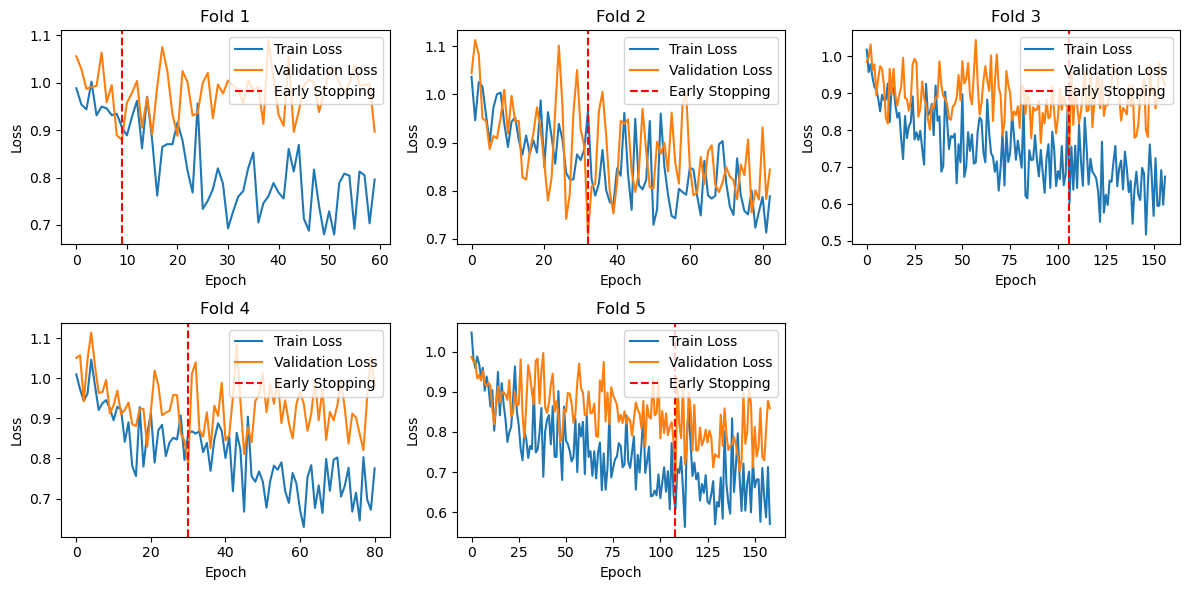

In [9]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [17]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-mallorca-atp-singles',
                                            'past-eastbourne-atp-singles',
                                            # 'past-wimbledon-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

if len(new_list_vectors_test) == 0:
    print('No data to predict')
    sys.exit(0)

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-mallorca-atp-singles', 'past-eastbourne-atp-singles'} ...
... loaded 57 matches
Updating id table ...
... id table updated


100%|██████████| 2/2 [00:00<00:00, 30.62it/s]

Error 'm0ni' for match bRGqkx0f in tournament past-mallorca-atp-singles
Error 'cf59' for match EsqAYsjI in tournament past-mallorca-atp-singles
Error 'bd06' for match UgZVvnpL in tournament past-mallorca-atp-singles
Error 'm0qi' for match zJKuAu4j in tournament past-mallorca-atp-singles
Error 'm0ni' for match 6Di1OYj4 in tournament past-mallorca-atp-singles
Error 'h997' for match t89ppsM0 in tournament past-mallorca-atp-singles
Error 'j0a4' for match U7E4goaE in tournament past-mallorca-atp-singles
Error 'tb69' for match QuHS9ZyB in tournament past-mallorca-atp-singles
Error 'mu94' for match zgqIKjjT in tournament past-mallorca-atp-singles
Error 'lb66' for match QZ7DiPTQ in tournament past-mallorca-atp-singles
Error 'f510' for match M5gqn3il in tournament past-mallorca-atp-singles
Error 'n0bg' for match UDNJBe7b in tournament past-mallorca-atp-singles
Error 'cf59' for match AobhQfMi in tournament past-mallorca-atp-singles
Error 'bd06' for match 48ZmFUDj in tournament past-mallorca-atp-

  0%|          | 0/6 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 4
Test Loss: for 1 : 0.93
Test Loss: for 2 : 1.39
Test Loss: for 3 : 1.27
Test Loss: for 4 : 0.65
Test Loss: for 5 : 1.05


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.6 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Betting

Match : KnQZdyOt Giron M. - Cerundolo F., no bet on player 1 (model pred =0.47)
Match : KnQZdyOt Giron M. - Cerundolo F., no bet on player 2 (model pred =0.25)
Match : IoEzQG7M Kecmanovic M. - Baez S., no bet on player 1 (model pred =0.37)
Match : IoEzQG7M Kecmanovic M. - Baez S., no bet on player 2 (model pred =0.34)
Match : S4XIy2bK Shevchenko A. - Tabilo A., no bet on player 1 (model pred =0.20)
Match : S4XIy2bK Shevchenko A. - Tabilo A., no bet on player 2 (model pred =0.54)
Match : GEJreFhg Kecmanovic M. - Zhang Z., no bet on player 1 (model pred =0.18)
Match : GEJreFhg Kecmanovic M. - Zhang Z., no bet on player 2 (model pred =0.56)

Total amount after betting : 100.00
Relative lost 0.00%


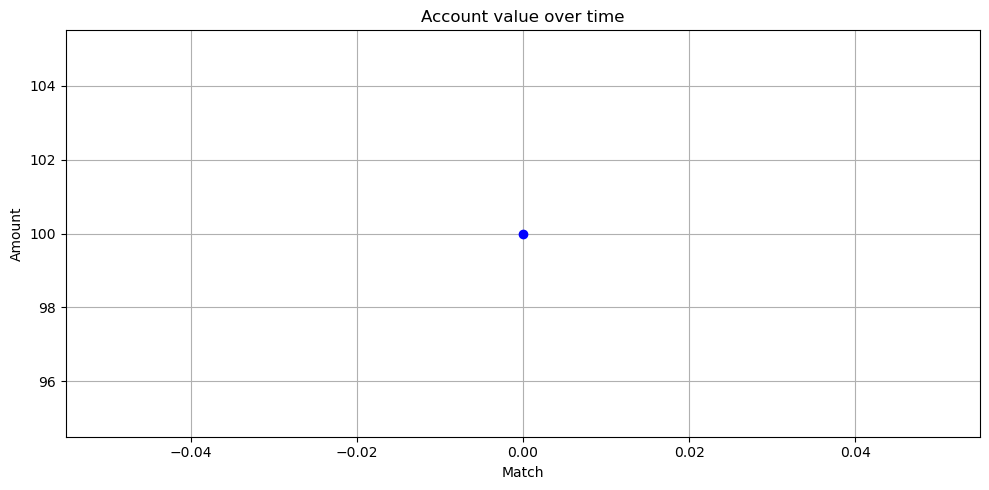

In [18]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds-1)))*safe

test = df.copy()
test['prob_player1'] = ((1+test['predictions'])/2)**1.5
test['prob_player2'] = ((1-test['predictions'])/2)**1.5
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)

account_values = []

amount = INIT_AMOUNT
account_values.append(amount)
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0.0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * (row['odds_1']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else : 
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 1 (model pred ={row['prob_player1']:.2f})")
    if row['kelly_criterion_player2'] > 0.0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * (row['odds_2']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else :
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 2 (model pred ={row['prob_player2']:.2f})")
print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()
# print the results of the strategy


## Autre

In [19]:
CONFIDENCE_THRESHLOLD = 0.6

# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds)))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount >= INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")


Total amount after betting : 100.00
Relative won 0.00%
